# <div class="alert alert-block alert-success" dir="rtl" style="text-align: center;"><strong><span style="font-size: 20pt">Classification <br /></span></strong></div>

### <font color='Red'><u>1.Understand the problem</u></font>

The breast cancer dataset is available in the sklearn library. It’s a well-established dataset used for binary classification tasks.
The dataset includes features related to breast cancer characteristics, such as tumor size, texture, and other measurements.
The target variable is binary, indicating whether a tumor is malignant (cancerous) or benign (non-cancerous).

##### Objective:
The goal is to evaluate ability to apply supervised learning techniques to this dataset. This involves:
1.  Loading and Preprocessing: Preparing the data for analysis.
2.  Classification Algorithm Implementation: Applying various classification algorithms. 
3.  Model Comparison: Assessing the performance of different algorithms.

#### <font color='Red'>2.<u> Data Loading and Preprocessing</u></font>

<b>Importing the required libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Load the dataset</b>

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

<b>Convert to DataFrame for easier manipulation</b>

Let <b>X</b> be the Feature data and <b>Y</b> be the target data 

In [3]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
Y = pd.Series(cancer.target, name='target')

#### <font color='Red'>3.<u>Exploratory Data Analysis (EDA)</u></font>

Inspect the first few rows using functions like head()

In [4]:
print("first few rows of the features:\n",X.head())
print("first few rows of the target:\n",Y.value_counts())

first few rows of the features:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture

<b>Statistics Summary</b>

In [12]:
print(X.describe())


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

 <b>Check for missing values</b>

In [13]:
print(X.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


##### <b>Handling Missing Values</b>
Although the breast cancer dataset typically has no missing values, this step ensures you handle any potential issues:

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_feature_data = imputer.fit_transform(X)

In [6]:

print("These are the features: \n",X.value_counts())
print("These are the target: \n",Y.value_counts(normalize=True) * 100)


These are the features: 
 mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
6.981        13.43         43.79           143.5      0.11700          0.07568           0.00000         0.00000              0.1930         0.07818                 0.2241        1.5080         1.553            9.833       0.010190          0.010840           0.00000          0.000000              0.02659         0.004100                 7.93          19.54          50.41            185.2       0.1584            0.12020            0.00000          0.00000 

#### <b>Correlation Matrix</b>
Generate a correlation matrix to identify relationships between variables.

In [7]:
correlation_matrix = X.corr()
print(correlation_matrix)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

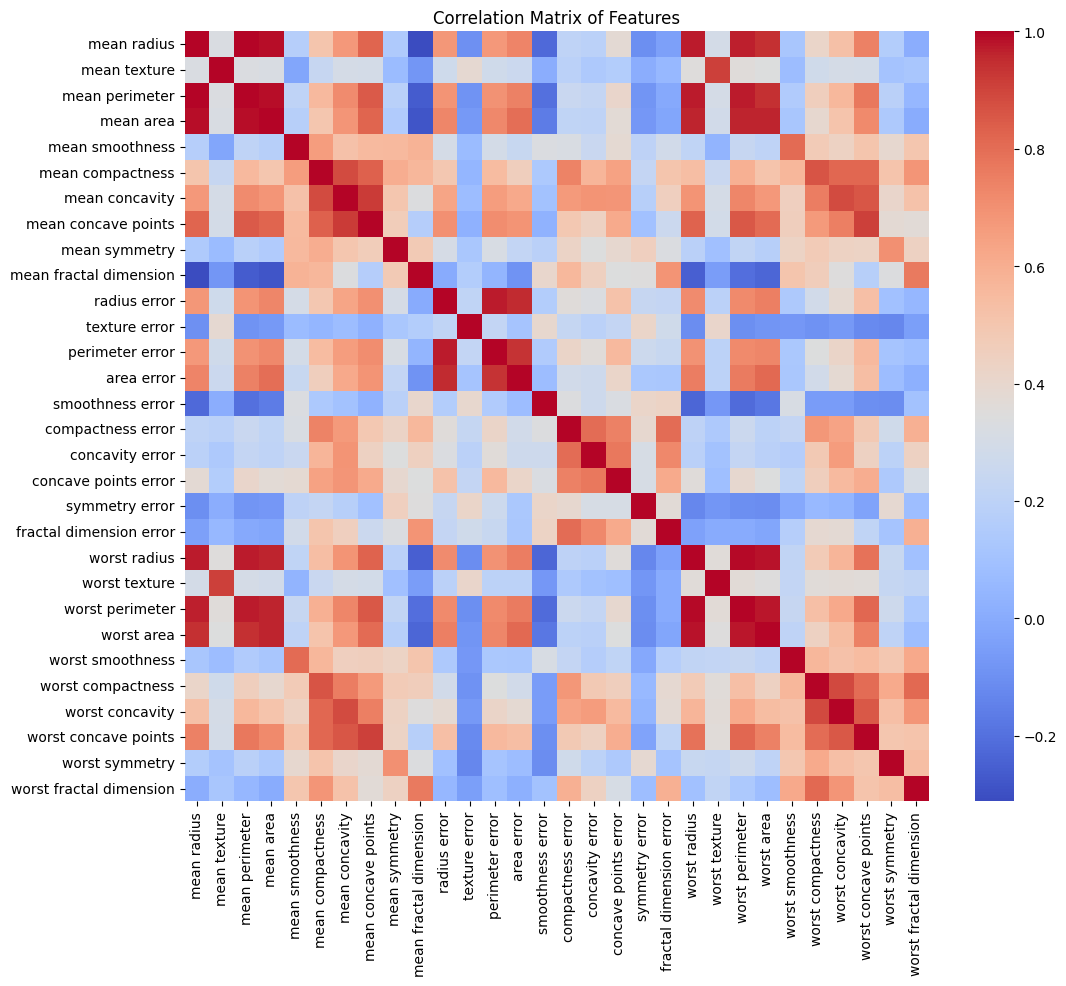

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,  fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

##### <b>Feature Distributions</b>
Visualize the distribution of key features to understand their behavior:

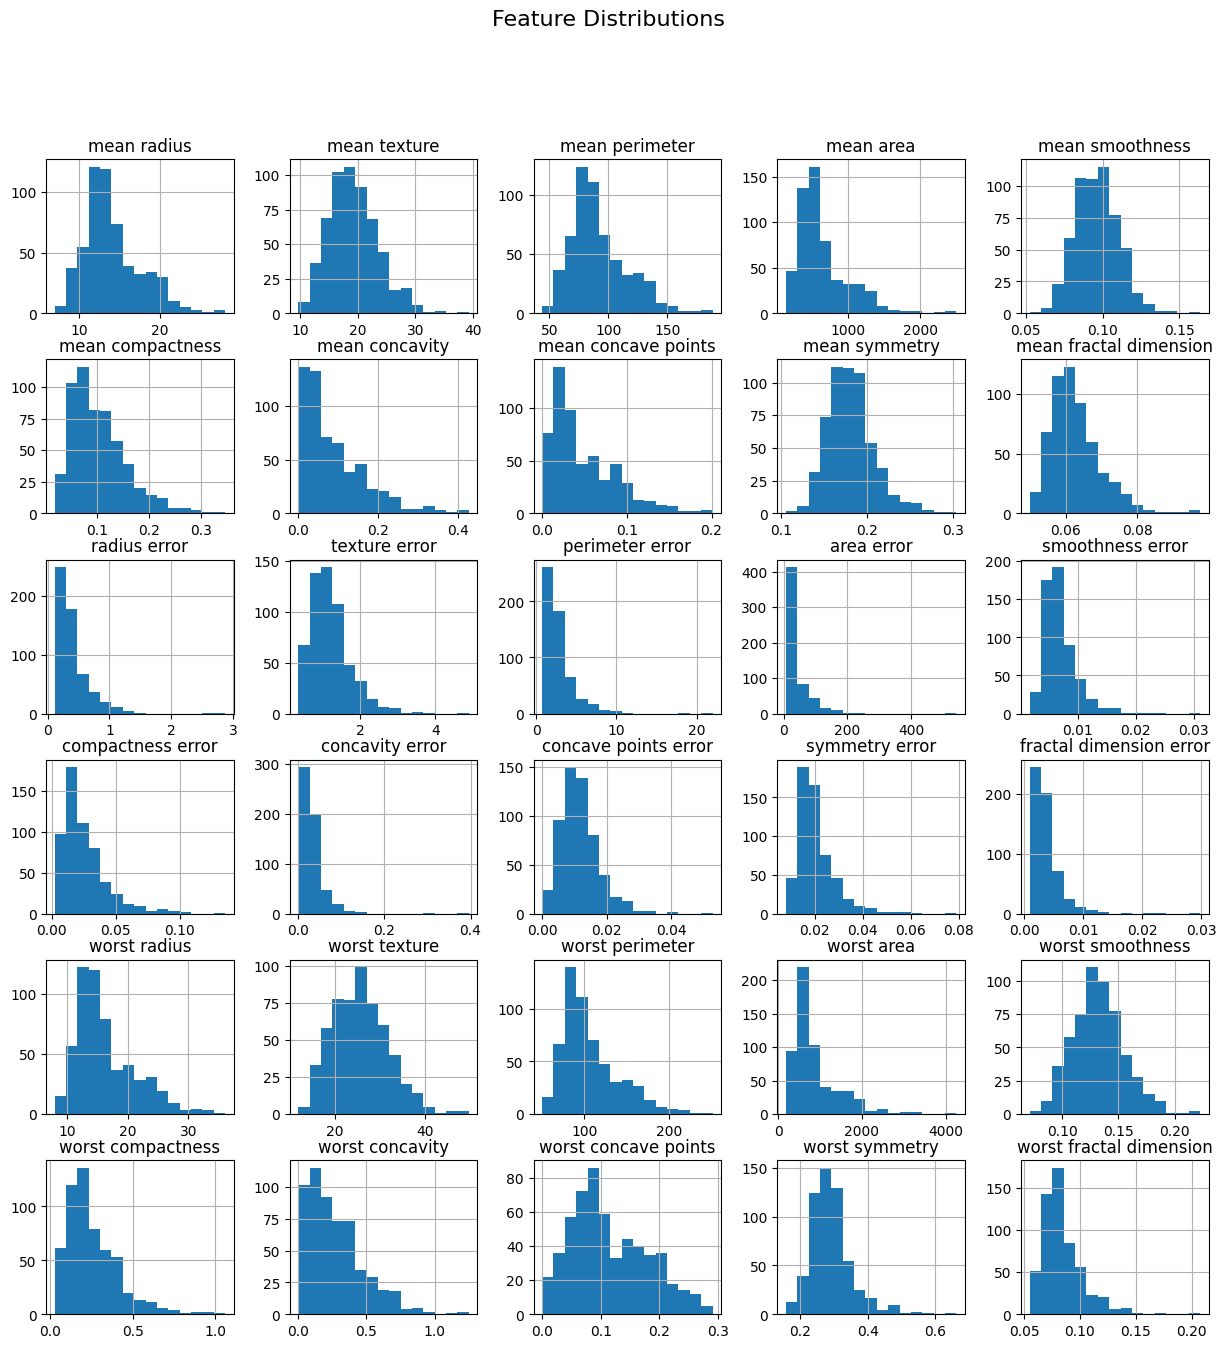

In [9]:
X.hist(bins=15, figsize=(15, 15))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()


<b>Plotting a pairplot</b>

plotting a pairplot using seaborn to have comprehensive overview of the relationships across multiple features.

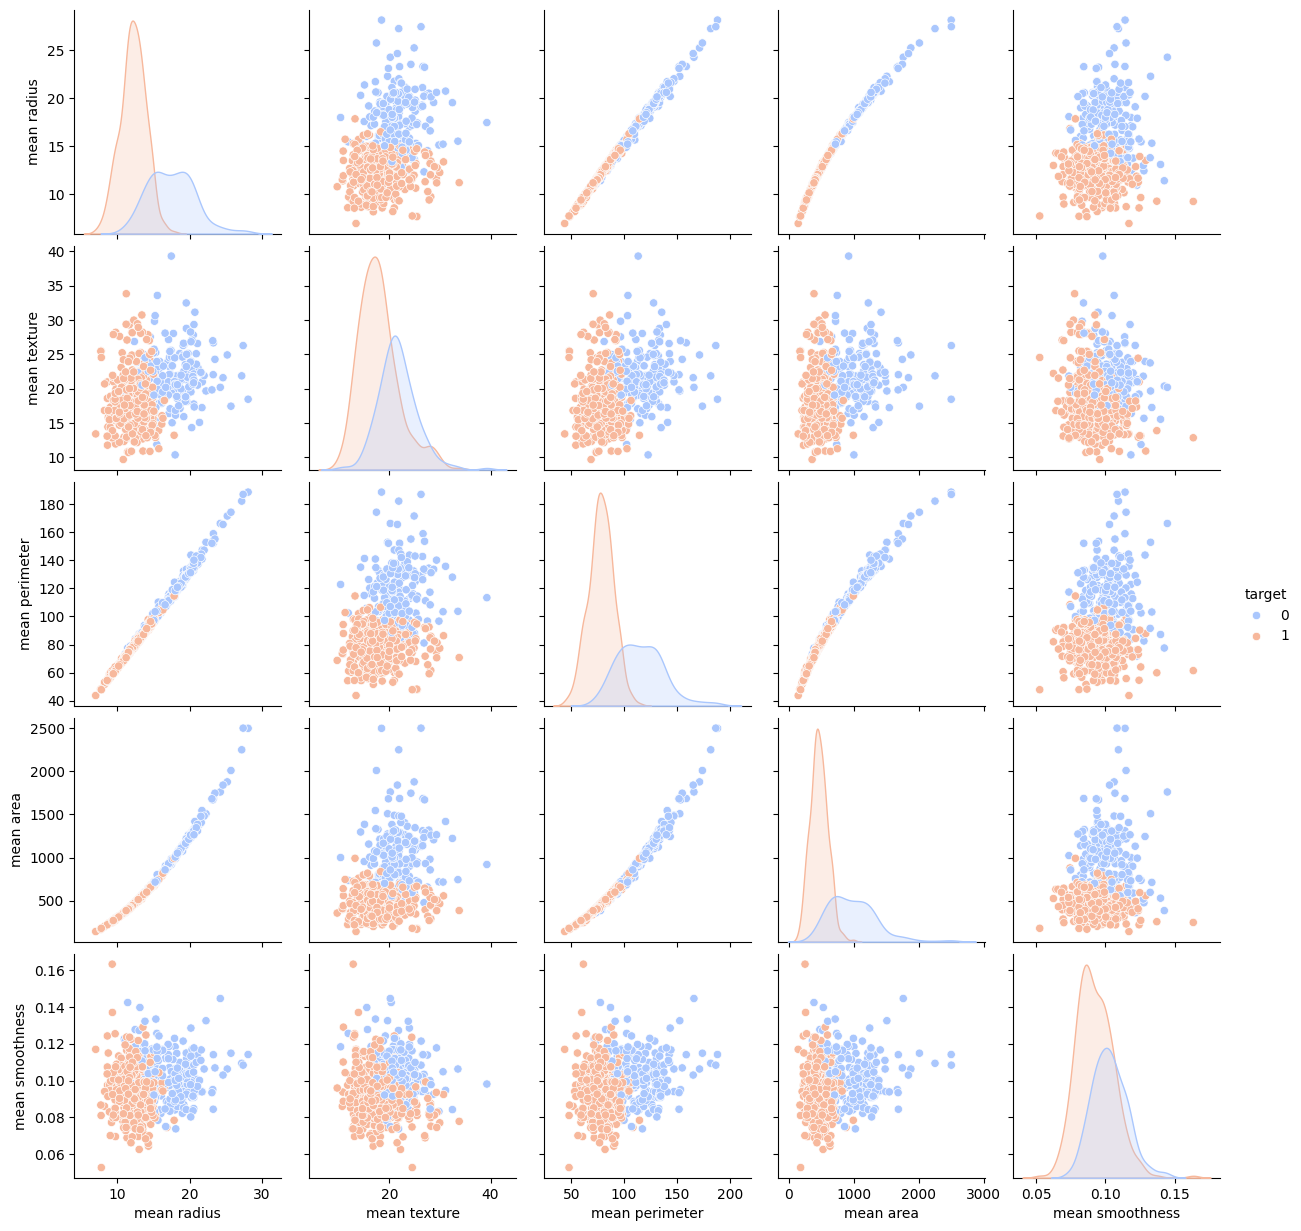

In [10]:
data = pd.concat([X, Y], axis=1)
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
sns.pairplot(data, vars=selected_features, hue='target', diag_kind='kde', palette='coolwarm')


By analyzing these pair plots, you can gain a deeper understanding of the relationships between features and how they might contribute to classifying breast cancer as benign or malignant.

#### <b> Box Plot</b>
Detecting the outliers

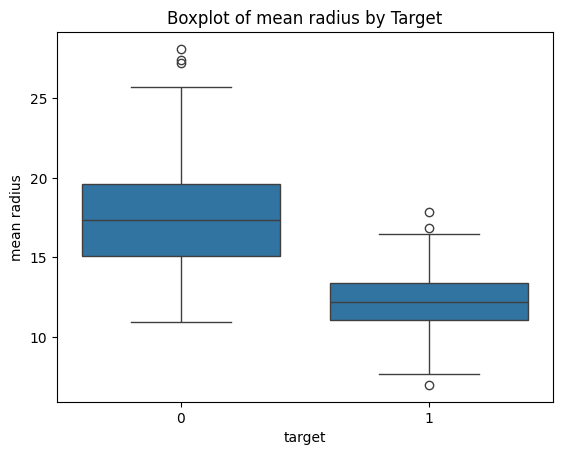

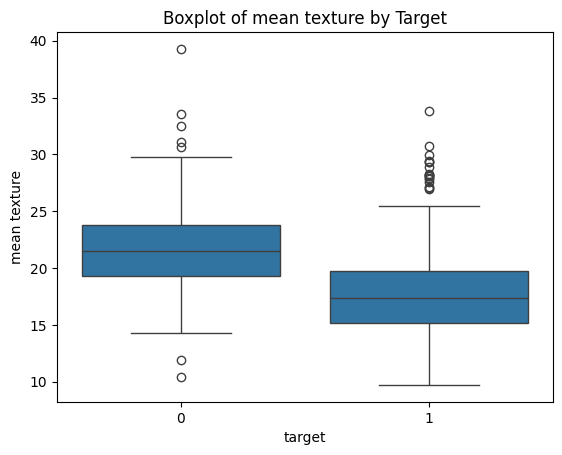

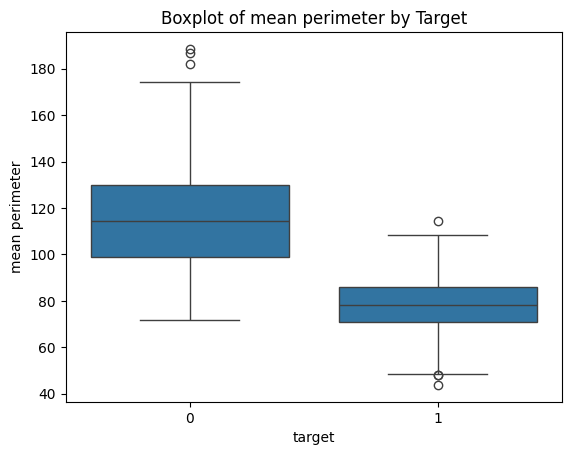

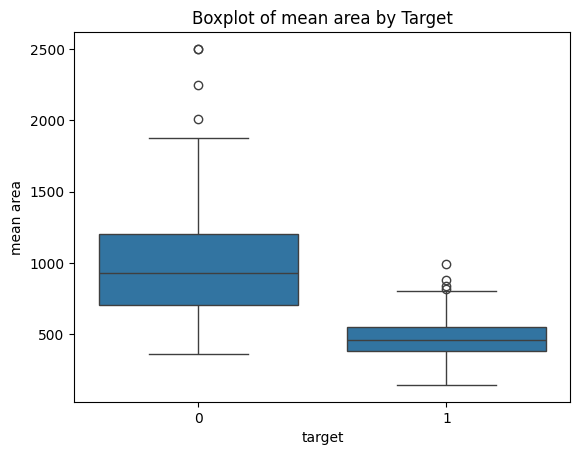

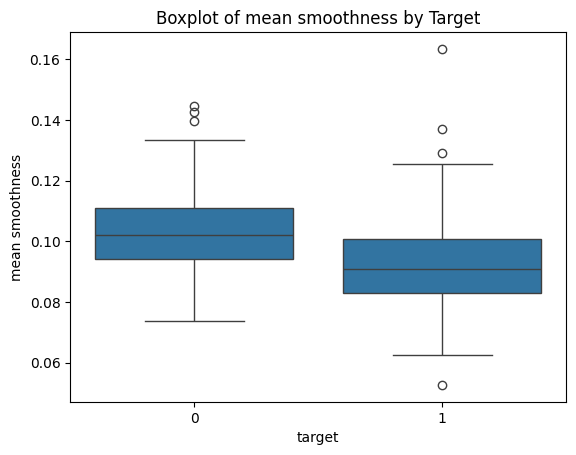

In [11]:
feature_columns = X.columns[:5]
for feature in feature_columns:
    sns.boxplot(x=Y, y=X[feature])
    plt.title(f'Boxplot of {feature} by Target')
    plt.show()

<b> Identify Outliers</b>

In [12]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q1 - 1.5 * IQR
lower_bound = Q3 + 1.5 * IQR
outliers = ((X < upper_bound) | (X > lower_bound))
print(outliers.sum())

mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
dtype: int64


<b>Remove Outliers</b>

In [13]:
new_X = X[(X >= lower_bound) & (X <= upper_bound)].dropna()
new_Y= Y[new_X.index]

In [14]:
print("Original feature data shape:", X.shape)
print("Feature data shape after removing outliers:", new_X.shape)
print("Original target data shape:", Y.shape)
print("Target data shape after removing outliers:", new_Y.shape)


Original feature data shape: (569, 30)
Feature data shape after removing outliers: (0, 30)
Original target data shape: (569,)
Target data shape after removing outliers: (0,)


#### <font color='Red'></font>

#### <font color='Red'>4.<u> Data Splitting & Feature Scailing</u></font>

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
print("X training data :",X_train)
print("X testing data :",Y_test)

X training data : [[-1.44798723 -0.45602336 -1.36665103 ...  0.91959172  2.14719008
   1.85943247]
 [ 1.97750799  1.69418666  2.08961867 ...  2.6752184   1.9368786
   2.46346488]
 [-1.40708919 -1.26351565 -1.34976305 ... -0.97048581  0.61676962
   0.05287682]
 ...
 [ 0.04621146 -0.57470379 -0.06874782 ... -1.23756033 -0.71628161
  -1.26047806]
 [-0.04183295  0.07687501 -0.03497186 ...  1.03683652  0.45013821
   1.19444266]
 [-0.5530585   0.28631105 -0.60751564 ... -0.61357437 -0.33448538
  -0.84042616]]
X testing data : 204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int32


In [17]:
print("Y testing data :",Y_test)
print("Y training set :",Y_train)

Y testing data : 204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int32
Y training set : 68     1
181    0
63     1
248    1
60     1
      ..
71     1
106    1
270    1
435    0
102    1
Name: target, Length: 455, dtype: int32


#### <font color = 'Red'>5.<u> Classification Algorithms</u></font>

##### 1. <b><u>LOGISTIC REGRESSION</b></u>
Logistic Regression is a linear model used for binary classification tasks. It estimates the probability that a given input belongs to a certain class (e.g., whether a tumor is malignant or benign) by applying the logistic function to a linear combination of the input features.Logistic Regression is simple, interpretable, and works well when the relationship between the features and the target variable is approximately linear.



<b> Implementation</b>

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)
predict_LR = LR.predict(X_test)

<b> Evaluation </b>

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


<b> <font color='Green'>Confusion Matrix </b></font>

In [22]:
LR_cm = confusion_matrix(Y_test, predict_LR)
print("Logistic Regression Confusion Matrix:\n",LR_cm)


Logistic Regression Confusion Matrix:
 [[41  2]
 [ 1 70]]


<font color='Green'><b>Classification Report</b></font>

In [23]:
LR_cr = classification_report(Y_test, predict_LR)
print("Logistic Regression Classification Report:\n",LR_cr)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<font color='Green'><b>Accuracy Score</font></b>

In [24]:
LR_accuracy = accuracy_score(Y_test, predict_LR)
print("Logistic Regression Accuracy:", LR_accuracy)

Logistic Regression Accuracy: 0.9736842105263158


<b><u>High Accuracy</u></b> : The model has an accuracy of 97.37%, indicating that it correctly classified most instances in the test set.

<b><u>High Precision and Recall</u></b>: Both precision and recall are high for both classes, meaning the model is good at both detecting positive instances (class 1) and avoiding false positives (especially important in a medical context like breast cancer detection).


##### <b>2. <u>DECISION TREE </u></b>

A Decision Tree Classifier splits the data into subsets based on feature values, creating a tree-like structure where each node represents a decision point, and each leaf represents a class label. The tree grows by recursively splitting the data until a stopping criterion is met (e.g., maximum depth or minimum samples per leaf).Decision Trees are easy to interpret, handle both numerical and categorical data, and capture non-linear relationships between features and the target variable.

<b> Implementation</b>

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
predict_DT = DT.predict(X_test)

<b>Model Evaluation</b>

<font color='Green'><b>Confusion Matrix</b></font>

In [29]:
DT_cm = confusion_matrix(Y_test, predict_DT)
print("Decision Tree Confusion Matrix:\n",DT_cm)


Decision Tree Confusion Matrix:
 [[39  4]
 [ 3 68]]


<font color='Green'><b>Classification Report</b></font>

In [43]:
DT_cr = classification_report(Y_test, predict_DT)
print("Decision Tree Classification Report:\n",DT_cr)


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



<font color='Green'><b>Accuracy Score</font></b>

In [32]:
DT_accuracy = accuracy_score(Y_test, predict_DT)
print("Decision Tree Accuracy:", DT_accuracy)

Decision Tree Accuracy: 0.9385964912280702


The accuracy of your Decision Tree model is approximately 93.86%. This means that the model correctly classified about 93.86% of the instances in the test set.Although the Decision Tree model performed well, its accuracy is slightly lower than that of the Logistic Regression model.

##### <b>3.<u> RANDOM FOREST CLASSIFIER</b></u>


Random Forest is an ensemble learning method that builds multiple Decision Trees (a "forest") during training and combines their predictions to improve accuracy and reduce overfitting. Each tree is trained on a random subset of the data, and the final prediction is typically the majority vote from all the trees.Random Forest is robust, less prone to overfitting than individual Decision Trees, and can handle a large number of features and data samples well.

<b> Implementation</b>

In [34]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
predict_RF = RF.predict(X_test)

<b>Model Evaluation</b>

<font color='Green'><b>Confusion Matrix</b></font>

In [35]:
RF_cm = confusion_matrix(Y_test, predict_RF)
print("Random Forest Confusion Matrix:\n",RF_cm)


Random Forest Confusion Matrix:
 [[40  3]
 [ 1 70]]


<font color='Green'><b>Classification Report</b></font>

In [41]:
RF_cr = classification_report(Y_test, predict_RF)
print("Random Forest Classification Report:\n",RF_cr)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<font color='Green'><b>Accuracy Score</font></b>

In [44]:
RF_accuracy = accuracy_score(Y_test, predict_RF)
print("Random Forest Accuracy:",RF_accuracy)

Random Forest Accuracy: 0.9649122807017544


The accuracy of your Random Forest model is 96.49%, indicating that the model correctly classified approximately 96.49% of the instances in the test set. The Random Forest model offers a strong balance between complexity and performance, making it a competitive choice for classification tasks like this one. Its accuracy is high, and it benefits from reduced overfitting compared to the single Decision Tree model.








##### <b> 4. <u>SUPPORT VECTOR MACHINE (SVM)</u></B>

SVM aims to find the hyperplane that best separates the classes in the feature space by maximizing the margin between the nearest data points (support vectors) of each class. SVMs can also be applied to non-linear data using kernel tricks.SVMs are powerful for high-dimensional spaces and are effective when there’s a clear margin of separation between classes. They are also effective in cases where the number of dimensions exceeds the number of samples.

<b> Implementation</b>

In [39]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, Y_train)
predict_SVM = SVM.predict(X_test)

<b>Model Evaluation</b>

<font color='Green'><b>Confusion Matrix</b></font>

In [40]:
SVM_cm = confusion_matrix(Y_test, predict_SVM)
print("SVM Confusion Matrix:\n",SVM_cm)


Random Forest Confusion Matrix:
 [[41  2]
 [ 1 70]]


<font color='Green'><b>Classification Report</b></font>

In [50]:
SVM_cr = classification_report(Y_test, predict_SVM)
print("SVM Classification Report:\n",SVM_cr)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<font color='Green'><b>Accuracy Score</font></b>

In [52]:
SVM_accuracy = accuracy_score(Y_test, predict_RF)
print("SVM Accuracy:",SVM_accuracy)

SVM Accuracy: 0.9649122807017544


The accuracy of your Support Vector Machine (SVM) model is 96.49%, which is identical to the accuracy of your Random Forest model.
The SVM model performed very well, matching the performance of the Random Forest model and only slightly below the Logistic Regression model.
The SVM model is a strong performer on this dataset, with an accuracy that closely matches the best models you have tested. It's a reliable choice, particularly in scenarios with well-separated classes or where maximizing the margin between classes is beneficial.

<b>5. <u>K- NEAREST NEIGHBOUR CLASSIFIER(KNN)</u></b>


k-NN is a simple, instance-based learning algorithm that classifies a data point based on the majority class of its k nearest neighbors in the feature space. The "distance" between data points is typically calculated using Euclidean distance. k-NN is easy to understand, doesn’t make strong assumptions about the data, and can capture complex patterns when k is chosen appropriately

<b> Implementation</b>

In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)
predict_KNN = KNN.predict(X_test)

<b>Model Evaluation</b>

<font color='Green'><b>Confusion Matrix</b></font>

In [49]:
KNN_cm = confusion_matrix(Y_test, predict_SVM)
print("KNN Confusion Matrix:\n",KNN_cm)


KNN Confusion Matrix:
 [[41  2]
 [ 1 70]]


<font color='Green'><b>Classification Report</b></font>

In [51]:
KNN_cr = classification_report(Y_test, predict_KNN)
print("KNN Classification Report:\n",KNN_cr)

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



<font color='Green'><b>Accuracy Score</font></b>

In [53]:
KNN_accuracy = accuracy_score(Y_test, predict_RF)
print("KNN Accuracy:",KNN_accuracy)

KNN Accuracy: 0.9649122807017544


The accuracy of your k-Nearest Neighbors (k-NN) model is 96.49%, which matches the accuracy of both the Random Forest and SVM models.
The k-NN model is another strong performer, achieving the same high accuracy as the Random Forest and SVM models. This consistency across multiple models suggests that the dataset is well-suited to a variety of classification techniques, each offering competitive performance.








#### <font color='Red'><b>6. Model Comparison</b></font>

><u><b>Best Overall Model</u></b>: Logistic Regression stands out as the best model overall due to its highest accuracy and strong performance in both precision and recall. It provides the best balance between correctly identifying positive cases and avoiding false positives.

><u><b>Strong Competitors</u></b>: Random Forest, SVM, and k-NN all performed very similarly and slightly lower than Logistic Regression but still showed strong accuracy and balanced performance across metrics.

><u><b>Model Choice Considerations</b></u>:
<b>Logistic Regression</b> is recommended for its high accuracy and interpretability.
Random Forest, SVM, and k-NN are also strong choices, particularly when robustness to outliers or handling non-linear relationships is important.
Decision Tree might need further tuning or pruning to improve its performance.
In summary, the choice of model should consider the specific needs of your application, such as the trade-off between interpretability, performance, and robustness.